In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data["Cabin"] = train_data['Cabin'].fillna("Unknown")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [5]:
test_data["Cabin"] = test_data['Cabin'].fillna("Unknown")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [6]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
train_data['Title']=train_data.apply(replace_titles, axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr


In [7]:
test_data['Title']=test_data['Name'].map(lambda x: substrings_in_string(x, title_list))
test_data['Title']=test_data.apply(replace_titles, axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs


In [8]:
train_data.drop('Name' , axis = 1 , inplace =True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,Unknown,S,Mr


In [9]:
test_data.drop('Name' , axis = 1 , inplace =True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Unknown,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,Unknown,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,Unknown,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,Unknown,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs


In [10]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_data['Deck']=train_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown


In [11]:
test_data['Deck']=test_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,Unknown
1,893,3,female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,Unknown
2,894,2,male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,Unknown
3,895,3,male,27.0,0,0,315154,8.6625,Unknown,S,Mr,Unknown
4,896,3,female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,Unknown


In [12]:
#Replacing T deck with closest deck G because there is only one instance of T
train_data["Deck"].replace('T' , 'G' , inplace = True)
train_data.drop('Cabin' , axis = 1 , inplace =True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Unknown


In [13]:
test_data.drop('Cabin' , axis = 1 , inplace =True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr,Unknown
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs,Unknown
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr,Unknown
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr,Unknown
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs,Unknown


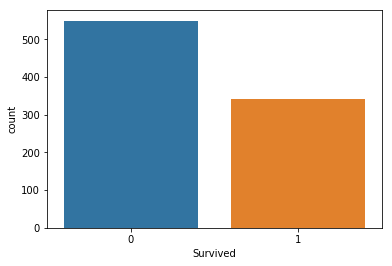

In [14]:
import seaborn as sns
label = train_data["Survived"]
sns.countplot(label)

In [15]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% rate of women survived",rate_women)

% rate of women survived 0.7420382165605095


In [16]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% rate of men survived",rate_men)

% rate of men survived 0.18890814558058924


Text(0.5, 1.0, 'Survived passenger under age 21')

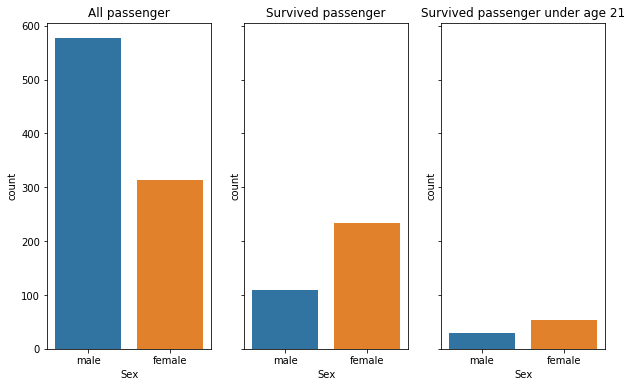

In [17]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Sex' , data=train_data , ax = ax[0] , order=['male' , 'female'])
b = sns.countplot(x = 'Sex' , data= train_data[label == 1] , ax = ax[1] , order=['male' , 'female'])
c = sns.countplot(x = 'Sex' , data= train_data[ ((train_data['Age'] < 21) & (label == 1)) ] , order=['male' , 'female'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
ax[2].set_title('Survived passenger under age 21')

Text(0.5, 1.0, 'Survived passanger under age 21')

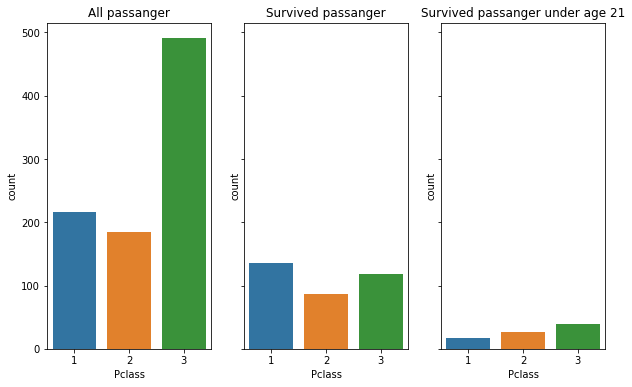

In [18]:
fig, ax =plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Pclass' , data=train_data , ax = ax[0] , order=[1 ,2,3])
b = sns.countplot(x = 'Pclass' , data=train_data[label == 1] , ax = ax[1] , order=[1 ,2,3])
c = sns.countplot(x = 'Pclass' , data=train_data[ ((train_data['Age'] < 21) & (label == 1)) ] , order=[1,2,3])
ax[0].set_title('All passanger')
ax[1].set_title('Survived passanger')
ax[2].set_title('Survived passanger under age 21')

Text(0.5, 1.0, 'Survived passanger under age 21')

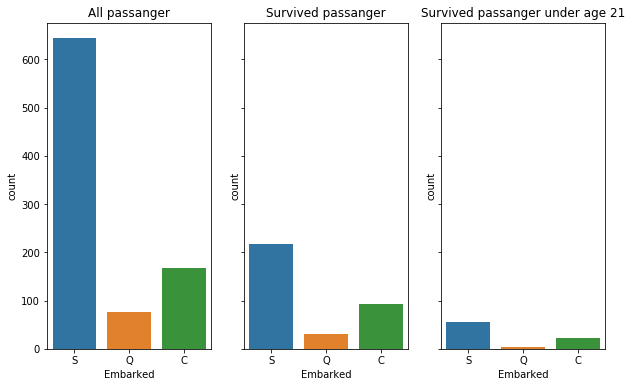

In [19]:
fig, ax =plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Embarked' , data=train_data , ax = ax[0] , order=['S' ,'Q','C'])
b = sns.countplot(x = 'Embarked' , data= train_data[label == 1] , ax = ax[1] , order=['S' ,'Q','C'])
c = sns.countplot(x = 'Embarked' , data= train_data[ ((train_data['Age'] < 21) & (label == 1)) ] , order=['S' ,'Q','C'])
ax[0].set_title('All passanger')
ax[1].set_title('Survived passanger')
ax[2].set_title('Survived passanger under age 21')

In [20]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
Deck             0
dtype: int64

In [21]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Title           0
Deck            0
dtype: int64

In [22]:
train_data.loc[train_data.Embarked.isna() , 'Embarked'] = 'S'
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Unknown


In [23]:
groupMatter = train_data.groupby(['Pclass' , 'Sex' , 'Embarked'])
groupMatter.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,1,2,female,17.0,0,0,SC 1748,12.0000,C,Miss,Unknown
412,413,1,1,female,33.0,1,0,19928,90.0000,Q,Miss,C
473,474,1,2,female,23.0,0,0,SC/AH Basle 541,13.7917,C,Mrs,D
608,609,1,2,female,22.0,1,2,SC/Paris 2123,41.5792,C,Mrs,Unknown


In [24]:
age_to_fill = groupMatter[['Age']].median()
age_to_fill

Age
Pclass Sex    Embarked       
1      female C         37.00
              Q         33.00
              S         34.00
       male   C         36.50
              Q         44.00
              S         42.00
2      female C         22.00
              Q         30.00
              S         29.00
       male   C         29.50
              Q         57.00
              S         30.00
3      female C         14.25
              Q         20.00
              S         23.00
       male   C         26.00
              Q         27.00
              S         25.00

In [25]:
for cl in range(1,4):
    for sex in ['male' , 'female']:
        for E in ['C' , 'Q' , 'S']:
            filll = pd.to_numeric(age_to_fill.xs(cl).xs(sex).xs(E).Age)
            train_data.loc[(train_data.Age.isna() & (train_data.Pclass == cl) & (train_data.Sex == sex) 
                    &(train_data.Embarked == E)) , 'Age'] =filll
            test_data.loc[(test_data.Age.isna() & (test_data.Pclass == cl) & (test_data.Sex == sex) 
                    &(test_data.Embarked == E)) , 'Age'] =filll

In [26]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

In [27]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
Deck           0
dtype: int64

In [28]:
train_data.Ticket = pd.to_numeric(train_data.Ticket.str.split().str[-1] , errors='coerce')
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,21171.0,7.2500,S,Mr,Unknown
1,2,1,1,female,38.0,1,0,17599.0,71.2833,C,Mrs,C
2,3,1,3,female,26.0,0,0,3101282.0,7.9250,S,Miss,Unknown
3,4,1,1,female,35.0,1,0,113803.0,53.1000,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450.0,8.0500,S,Mr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536.0,13.0000,S,Mr,Unknown
887,888,1,1,female,19.0,0,0,112053.0,30.0000,S,Miss,B
888,889,0,3,female,23.0,1,2,6607.0,23.4500,S,Miss,Unknown
889,890,1,1,male,26.0,0,0,111369.0,30.0000,C,Mr,C


In [29]:
test_data.Ticket = pd.to_numeric(test_data.Ticket.str.split().str[-1] , errors='coerce')
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr,Unknown
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs,Unknown
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr,Unknown
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr,Unknown
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,25.0,0,0,3236,8.0500,S,Mr,Unknown
414,1306,1,female,39.0,0,0,17758,108.9000,C,Mr,C
415,1307,3,male,38.5,0,0,3101262,7.2500,S,Mr,Unknown
416,1308,3,male,25.0,0,0,359309,8.0500,S,Mr,Unknown


In [30]:
Ticket_median = train_data.Ticket.median()
train_data.Ticket.fillna(Ticket_median , inplace =True)
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

In [31]:
test_data.Fare.fillna(train_data.Fare.median() , inplace =True)
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

In [32]:
test_data.drop(['Ticket' ] ,axis = 1, inplace = True)
train_data.drop(['Survived','Ticket' ], axis =1, inplace =True )

In [33]:
cat_col = ['Pclass' , 'Sex' , 'Embarked' , 'Title' , 'Deck']
train_data.Pclass.replace({
    1 :'A' , 2:'B' , 3:'C'
} , inplace =True)
test_data.Pclass.replace({
    1 :'A' , 2:'B' , 3:'C'
} , inplace =True)
train_d1 = pd.get_dummies(train_data , columns=cat_col)
test_d1 = pd.get_dummies(test_data , columns=cat_col)
print(train_d1.shape , test_d1.shape)

(891, 25) (418, 25)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_d1= scaler.fit_transform(train_d1)
train_d1

array([[0.        , 0.27117366, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 0.4722292 , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.00224719, 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 0.28373963, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 0.32143755, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
test_d1 = scaler.transform(test_d1)
test_d1

array([[1.0011236 , 0.4282483 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.00224719, 0.58532295, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [1.00337079, 0.77381252, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.46741573, 0.47851219, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.46853933, 0.30887158, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.46966292, 0.32143755, 0.125     , ..., 0.        , 0.        ,
        1.        ]])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#model = RandomForestClassifier(bootstrap= True , min_samples_leaf= 3, n_estimators = 500 ,
#                               min_samples_split = 10, max_features = "sqrt", max_depth= 6)
#cross_val_score(model , train_d1 , label , cv=5)

In [37]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#cross_val_score(model , train_d1 , label , cv=5)

In [38]:
from sklearn.svm import SVC
#model = SVC(C=4)
#cross_val_score(model , train_d1 , label , cv=5)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#model = LinearDiscriminantAnalysis()
#cross_val_score(model, train_d1, label, cv=5)

LR: 0.830549 (0.045532)
LDA: 0.827166 (0.049771)
SVM: 0.815943 (0.045807)
RForest: 0.815943 (0.046082)


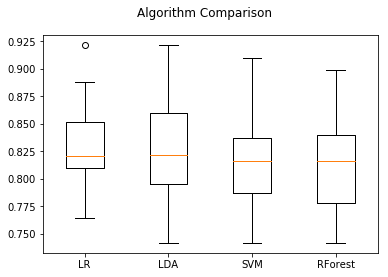

In [40]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from pprint import pprint

seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RForest',RandomForestClassifier()))

results = []
names = []


def gather_results(models,names,results):
    # evaluate each model in turn
    scoring = 'accuracy'
    max = 0
    maxModel=models[0][1]
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
        cv_results = model_selection.cross_val_score(model, train_d1, label, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        if(cv_results.mean() > max):
            max = cv_results.mean()
            maxModel = model
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

def add_voting(models,names,results):
    eclf = VotingClassifier(estimators=models,voting='hard')
    kfold = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)

    scores = cross_val_score(eclf, train_d1, label,scoring='accuracy', cv=kfold)
    print("%s: %f (+/- %f)" % ("Voting",scores.mean(), scores.std()))

    names.append('Voting')
    results.append(scores)
    return eclf

def plot(names, results):
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
gather_results(models,names,results)
#vote_model = add_voting(models,names,results)
plot(names,results)

In [41]:
#print(models)
# Create first pipeline for base without reducing features.

#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('classifier' , )])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.
param_grid = []
for name, model in models:
    print('Parameters currently in use for ' + name)
    pprint(model.get_params())
    print('\n')
    
best_models = []
best_names=[]
best_results=[]

#best_models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#best_models.append(('SVM', SVC()))

Parameters currently in use for LR
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Parameters currently in use for LDA
{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}


Parameters currently in use for SVM
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


Parameters currently in use for RForest
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']
hyperparameters = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
gridsearch = GridSearchCV(models[0][1], hyperparameters, cv=5, verbose=1) # Fit grid search
random_search = RandomizedSearchCV(estimator = models[0][1], param_distributions = hyperparameters, n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)
best_model_lr = random_search.fit(train_d1, label)
print('Best params:', best_model_lr.best_estimator_.get_params())
label_lr = 'LR'
score_lr = best_model_lr.score(train_d1, label)
print("The mean accuracy of the model is:",score_lr)
#best_models.append((label_lr, (best_model_lr)))
#best_names.append(label_lr)
#best_results.append(score_lr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s


Best params: {'C': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The mean accuracy of the model is: 0.8439955106621774


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished


In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
hyperparameters = dict(n_estimators=n_estimators,
                  max_features=max_features,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                       bootstrap=bootstrap)
gridsearch = GridSearchCV(models[3][1], hyperparameters, cv=5, verbose=1) # Fit grid search
random_search = RandomizedSearchCV(estimator = models[3][1], param_distributions = hyperparameters, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)
best_model_forest = random_search.fit(train_d1, label)
print('Best params:', best_model_forest.best_estimator_.get_params())
label_forest = 'RForest'
score_forest = best_model_forest.score(train_d1, label)
print("The mean accuracy of the model is:",score_forest)
best_models.append((label_forest,best_model_forest))
best_names.append(label_forest)
best_results.append(score_forest)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


Best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
The mean accuracy of the model is: 0.877665544332211


Best names:  ['RForest']
Best results:  [0.877665544332211]


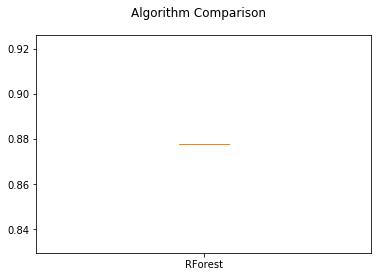

In [44]:
#vote_model = add_voting(best_models,best_names,best_results)
print("Best names: ",best_names)
print("Best results: ",best_results)
plot(best_names,best_results)

In [45]:
maxModel = best_model_forest
maxModel.fit(train_d1, label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [46]:
score_max = maxModel.score(train_d1, label)
print("The mean accuracy of the model is:",score_max)
predictions = maxModel.predict(test_d1)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.head()
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

The mean accuracy of the model is: 0.8933782267115601
Your submission was successfully saved!
